<a href="https://colab.research.google.com/github/ramirojc/Diplodatos2020/blob/master/Intro_Curacion_Georef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion, Analisis y Curacion de Datos

## Diplodatos 2020, Mentorias
### Mentor: Ramiro Caro

## Requisitos


In [ ]:
!pip install geopandas
!apt install libspatialindex-dev
!pip install rtree
!pip install osmnx
!pip install contextily

     |████████████████████████████████| 962kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 291kB/s 
     |████████████████████████████████| 10.9MB 43.7MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ub

     |████████████████████████████████| 18.2MB 58.9MB/s 


In [100]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

## Cargar informacion


In [ ]:
data_path = './drive/My Drive/BDGD/SULGIPE_46_2018-12-31_M10_20190611-1750.gdb'

In [ ]:
# Carguemos la tabla de consumidores de baja tension denominada UCBT
conj = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
conj.shape, conj.columns

((6, 9), Index(['COD_ID', 'DIST', 'NOM', 'SIST_INTE', 'SIST_SUBT', 'DESCR',
        'Shape_Length', 'Shape_Area', 'geometry'],
       dtype='object'))

In [ ]:
untrs = gpd.read_file(data_path, driver='FileGDB', layer='UNTRS')
untrs.shape, untrs.columns

((17, 53),
 Index(['COD_ID', 'SUB', 'BARR_1', 'BARR_2', 'BARR_3', 'PAC_1', 'PAC_2',
        'PAC_3', 'DIST', 'FAS_CON_P', 'FAS_CON_S', 'FAS_CON_T', 'SIT_ATIV',
        'TIP_UNID', 'POS', 'POT_NOM', 'POT_F01', 'POT_F02', 'PER_FER',
        'PER_TOT', 'BANC', 'DAT_CON', 'CONJ', 'MUN', 'TIP_TRAFO', 'ALOC_PERD',
        'ENES_01', 'ENES_02', 'ENES_03', 'ENES_04', 'ENES_05', 'ENES_06',
        'ENES_07', 'ENES_08', 'ENES_09', 'ENES_10', 'ENES_11', 'ENES_12',
        'ENET_01', 'ENET_02', 'ENET_03', 'ENET_04', 'ENET_05', 'ENET_06',
        'ENET_07', 'ENET_08', 'ENET_09', 'ENET_10', 'ENET_11', 'ENET_12',
        'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [ ]:
untrd = gpd.read_file(data_path, driver='FileGDB', layer='UNTRD')
untrd.shape, untrd.columns

((10508, 33),
 Index(['COD_ID', 'DIST', 'PAC_1', 'PAC_2', 'PAC_3', 'FAS_CON_P', 'FAS_CON_S',
        'FAS_CON_T', 'SIT_ATIV', 'TIP_UNID', 'POS', 'ATRB_PER', 'TEN_LIN_SE',
        'CAP_ELO', 'CAP_CHA', 'TAP', 'CONF', 'POSTO', 'POT_NOM', 'PER_FER',
        'PER_TOT', 'DAT_CON', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ', 'MUN', 'BANC',
        'TIP_TRAFO', 'MRT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [ ]:
ssmt = gpd.read_file(data_path, driver='FileGDB', layer='SSDMT')
ssmt.columns, ssmt.columns

(Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

## Manejo de objetos graficos con Shapely

https://shapely.readthedocs.io/en/latest/manual.html

### Objetos geometricos basicos

In [ ]:
untrs.geometry.head()

0    POINT (-37.83698 -11.37108)
1    POINT (-37.78467 -11.26908)
2    POINT (-37.62577 -11.26438)
3    POINT (-37.83698 -11.37108)
4    POINT (-37.62577 -11.26438)
Name: geometry, dtype: geometry

In [ ]:
p = Point(1,0)
o = Point(0,0)

In [ ]:
p.length, p.area, p.bounds, p.x, p.y

(0.0, 0.0, (1.0, 0.0, 1.0, 0.0), 1.0, 0.0)

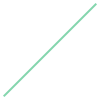

In [ ]:
l = LineString([(1,1),(-1,-1)])
l

In [ ]:
l.area, l.length, l.bounds, l.xy, l.centroid.xy

(0.0,
 2.8284271247461903,
 (-1.0, -1.0, 1.0, 1.0),
 (array('d', [1.0, -1.0]), array('d', [1.0, -1.0])),
 (array('d', [0.0]), array('d', [0.0])))

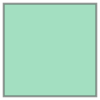

In [ ]:
c = Polygon([(0,0),(0,1),(1,1),(1,0)])
c

In [ ]:
c.area, c.length, c.bounds, c.centroid.xy

(1.0, 4.0, (0.0, 0.0, 1.0, 1.0), (array('d', [0.5]), array('d', [0.5])))

### Operaciones Basicas



In [ ]:
p.distance(l) # Distancia del punto a linea

0.7071067811865476

In [ ]:
l.contains(o) # Contiene

True

In [ ]:
l.intersects(c) # Interseccion

True

### Joints Espaciales

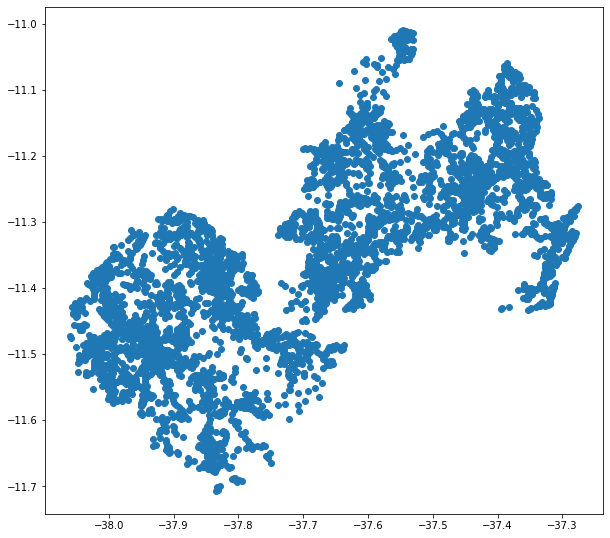

In [ ]:
st = gpd.sjoin(untrd[['COD_ID','CONJ','geometry']], conj[['NOM','geometry']].iloc[:3], how='inner', op='within', lsuffix='untrs',rsuffix='conj')
st.plot(figsize=(10,10))

In [ ]:
st.head()

,COD_ID,CONJ,geometry,index_conj,NOM
4,13_1130368,12743,POINT (-37.79758 -11.57597),1,TOMAR DO GERU
7,6_1060355,12743,POINT (-37.86610 -11.41645),1,TOMAR DO GERU
15,3_1030355,12743,POINT (-37.77537 -11.48095),1,TOMAR DO GERU
42,3_1030398,12743,POINT (-37.77335 -11.52384),1,TOMAR DO GERU
99,14_1140553,12743,POINT (-37.81908 -11.62573),1,TOMAR DO GERU


## Sistemas de Coordenadas de Referencia, CRS
https://geopandas.org/projections.html

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'WGS 84 - EPSG 4326')

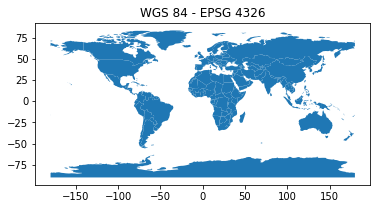

In [ ]:
ax = world.plot()
ax.set_title('WGS 84 - EPSG 4326')

Text(0.5, 1.0, 'Mercator - EPSG 3395')

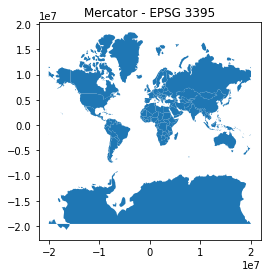

In [ ]:
ax = world.to_crs('EPSG:3395').plot()
ax.set_title('Mercator - EPSG 3395')

### Converting to SIRGAS 2000, EPSG 31982

In [ ]:
conj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
conj = conj.to_crs(epsg=31982)
untrs = untrs.to_crs(epsg=31982)
untrd = untrd.to_crs(epsg=31982)
ssmt = ssmt.to_crs(epsg=31982)

In [ ]:
conj.crs

<Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America - 54°W to 48°W, S hemisphere and SIRGAS 2000 by country
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
untrd.geometry.head()

0    POINT (1950270.638 8743922.604)
1    POINT (1948936.199 8745414.730)
2    POINT (1954060.419 8720300.758)
3    POINT (1958367.266 8740739.319)
4    POINT (1951338.207 8686332.312)
Name: geometry, dtype: geometry

## Generacion de features a partir de variables georeferenciadas

### Distancia Euclideana a puntos de referencia dentro del dataset

In [ ]:
dist_untrs = untrd.distance(untrs.geometry[0])
dist_untrs.head()

0    34237.458187
1    35667.123573
2    12151.451731
3    32663.529840
4    23661.615281
dtype: float64

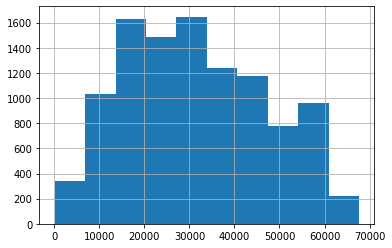

In [ ]:
dist_untrs.hist()

In [ ]:
untrd['eu_dis_trs'] = -1

for i,t in untrs.iterrows():
  eud = untrd[untrd.UNI_TR_S == t.COD_ID].distance(t.geometry)
  untrd.eu_dis_trs.loc[eud.index] = eud

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


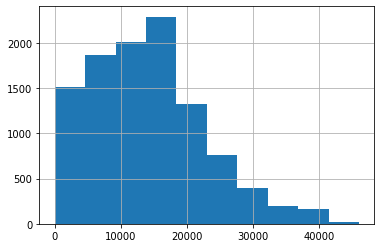

In [ ]:
untrd.eu_dis_trs.hist()

### Distancia Euclideana a objectos geograficos personalizados


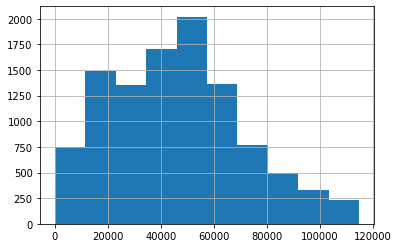

In [ ]:
l_costa = LineString([(2019457, 8723094), (1984286, 8670107)])

untrd['dist_mar'] = untrd.distance(l_costa)
untrd.dist_mar.hist()

### Descargar Referencias de OSM

In [ ]:
import osmnx as ox

In [ ]:
conj_deg = gpd.read_file(data_path, driver='FileGDB', layer='CONJ')
dist = conj_deg.dissolve(by='DIST')

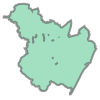

In [ ]:
dist.iloc[0].geometry

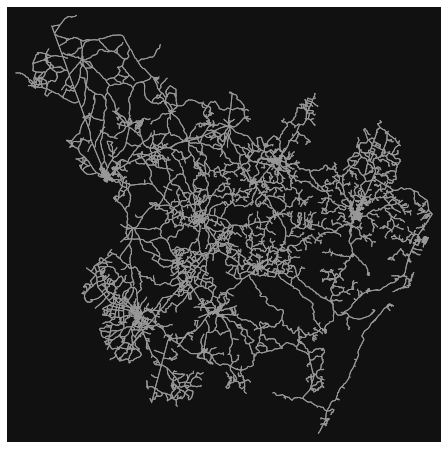

In [ ]:
G_conj = ox.graph_from_polygon(dist.iloc[0].geometry)
fig, ax = ox.plot_graph(G_conj, node_size=0)

In [ ]:
nodes, edges = ox.graph_to_gdfs(G_conj)

In [ ]:
edges.to_csv('edges_conj.csv')

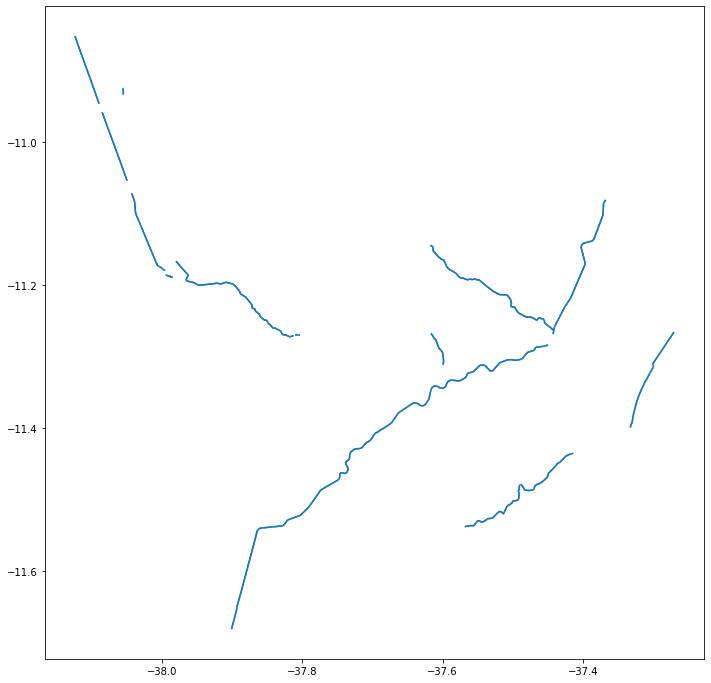

In [ ]:
edges[edges.name.str.contains('Rodovia').fillna(False)].plot(figsize=(12,12))

In [ ]:
mask = (edges.highway.str.contains('trunk').fillna(False) | edges.highway.str.contains('primary').fillna(False))

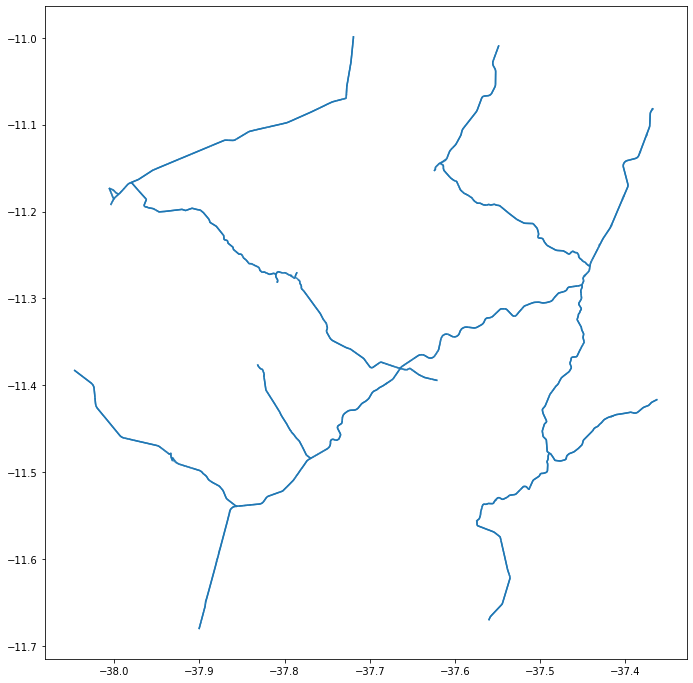

In [ ]:
main_roads = edges[['geometry','length','name','ref']][mask]
main_roads.plot(figsize=(12,12))

In [ ]:
main_roads['dist'] = 46

In [ ]:
main_roads_comb = main_roads.dissolve(by='dist')
main_roads_comb.to_crs(epsg=31982, inplace= True)

In [ ]:
untrd['main_r_dist'] = untrd.distance(main_roads_comb.iloc[0].geometry)

In [ ]:
untrd.head()

,COD_ID,DIST,PAC_1,PAC_2,PAC_3,FAS_CON_P,FAS_CON_S,FAS_CON_T,SIT_ATIV,TIP_UNID,POS,ATRB_PER,TEN_LIN_SE,CAP_ELO,CAP_CHA,TAP,CONF,POSTO,POT_NOM,PER_FER,PER_TOT,DAT_CON,CTMT,UNI_TR_S,SUB,CONJ,MUN,BANC,TIP_TRAFO,MRT,DESCR,ARE_LOC,geometry,eu_dist_trs,eu_dis_trs,dist_mar,main_r_dist
0,4_1040341,46,452971,ET4_1040341,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (1950270.638 8743922.604),-1,6186.338859,69162.337971,3969.238913
1,4_1040306,46,452681,ET4_1040306,0,ABC,ABCN,0,AT,38,PD,1,0.22,05H,1,1.0,RA,PT,15.0,100.0,440.0,15/03/2011,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,T,0,,NU,POINT (1948936.199 8745414.730),-1,7016.053103,71099.328857,5672.449812
2,7_2070013,46,600021,ET7_2070013,0,ABC,ABCN,0,AT,38,O,2,0.38,5H,1,1.0,RA,PT,112.5,440.0,1990.0,30/09/2010,1_SEITI_1,1_SEITI_1,SEITI,15601,2803005,0,T,0,,UB,POINT (1954060.419 8720300.758),-1,823.431864,52941.328294,2.029119
3,4_1040035,46,462831,ET4_1040035,ET4_1040035,AB,AN,BN,AT,38,PD,1,0.23,1H,1,1.0,RA,PT,15.0,85.0,355.0,30/09/2010,2_SESAQ_1,1_SESAQ_1,SESAQ,12737,2805802,0,MT,0,,NU,POINT (1958367.266 8740739.319),-1,11552.752642,60656.080045,1457.807951
4,13_1130368,46,148261,ET13_1130368,0,ABC,ABCN,0,AT,38,PD,1,0.38,2H,1,1.0,RA,PT,45.0,220.0,1000.0,18/10/2013,1_SETMG_1,2_SETMG_1,SETMG,12743,2917904,0,T,0,,NU,POINT (1951338.207 8686332.312),-1,23661.615281,36726.255363,5615.774855


### Arboles de busqueda espaciales

#### Calculo de densidad

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
ucbt = gpd.read_file(data_path, driver='FileGDB', layer='UCBT')
ucbt.shape, ssmt.columns

((148801, 40),
 Index(['COD_ID', 'PN_CON_1', 'PN_CON_2', 'CTMT', 'UNI_TR_S', 'SUB', 'CONJ',
        'DIST', 'PAC_1', 'PAC_2', 'FAS_CON', 'TIP_CND', 'POS', 'ODI_FAS',
        'TI_FAS', 'ODI_NEU', 'TI_NEU', 'COMP', 'DESCR', 'SITCONTFAS',
        'SITCONTNEU', 'ARE_LOC', 'Shape_Length', 'geometry'],
       dtype='object'))

In [ ]:
ucbt = ucbt.to_crs(epsg=31982)
ucbt_loc_array = [x.coords[0] for x in ucbt.geometry]
untrd_loc_array = [x.coords[0] for x in untrd.geometry]

In [ ]:
radio = 100
tree = cKDTree(ucbt_loc_array)
near_consumers = tree.query_ball_point(untrd_loc_array, radio)

In [ ]:
untrd['n_close_con'] = [len(c) for c in near_consumers]
untrd['is_urb'] =  untrd['n_close_con'] > 50

#### Distancia al elemento mas cercano

In [ ]:
trd_tree = cKDTree(untrd_loc_array)
d, i = trd_tree.query(untrd_loc_array, k=2, n_jobs=-1)

In [ ]:
untrd['closest_trd_i'] = [ti[1] for ti in i]
untrd['closest_trd_dist'] = [td[1] for td in d]

## Generacion de Features a partir de Grafos

### Creacion y Representacion
En este caso deseamos encontrar el camino a traves de la red electrica desde transformador de distribucion hasta el segmentador.

In [165]:
import networkx as nx

In [166]:
# Generar grafo basado en la red de distribucion
SG = nx.Graph()
SG.add_weighted_edges_from(ssmt[['PN_CON_1','PN_CON_2','COMP']].values.tolist(), weight='length')

In [167]:
# Agrego el COD_ID de cada segmento como atributo de Edge
ID_attr_dict = {tuple((x[0], x[1])): x[2] for x in ssmt[['PN_CON_1','PN_CON_2','COD_ID']].values}
nx.set_edge_attributes(SG, ID_attr_dict, 'SEG_ID')

In [168]:
SG.edges(['671470'], data=True)

EdgeDataView([('671470', '671471', {'length': 25.63, 'SEG_ID': '85187'}), ('671470', '671469', {'length': 25.63, 'SEG_ID': '85186'})])

Debemos asignar el nodo mas cercano a cada transformador de distribucion


In [79]:
ponnot = gpd.read_file(data_path, driver='FileGDB', layer='PONNOT')
ponnot.shape, ponnot.columns

((124647, 24),
 Index(['COD_ID', 'DIST', 'TIP_PN', 'POS', 'ESTR', 'MAT', 'ESF', 'ALT', 'CONJ',
        'MUN', 'ODI', 'TI', 'CM', 'TUC', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6',
        'SITCONT', 'DESCR', 'ARE_LOC', 'geometry'],
       dtype='object'))

In [80]:
ponnot = ponnot.to_crs(epsg=31982)
ponnot_loc_array = [x.coords[0] for x in ponnot.geometry]

In [83]:
pn_tree = cKDTree(ponnot_loc_array)
pd, pi = pn_tree.query(untrd_loc_array, n_jobs=-1)

In [95]:
untrd['PCON'] = [ponnot.iloc[i].COD_ID for i in pi]

In [112]:
ctmt_endpoints = pd.read_csv('./drive/My Drive/BDGD/endpoints_utf.csv')
ep_dict = {row.CTMT: str(row.PONNOT) for i,row in ctmt_endpoints.iterrows()}

In [115]:
untrd['ENDPCON'] = untrd.CTMT.map(ep_dict)

In [155]:
untrd = untrd[untrd.ENDPCON.notna()]

### Calculo de features por metricas del grafo

La topologia del grafo de por si nos puede proveer informacion importance sobre la red de distribucion.

In [207]:
print('calculando degree')
g_degree = SG.degree(untrd.PCON)

print('calculando neighbor degree')
g_avg_ndeg = nx.average_neighbor_degree(SG)

print('calculando closeness centrality')
#g_bet_cen = nx.betweenness_centrality(SG)

print('calculando pagerank')
g_pr = nx.pagerank(SG)

calculando degree
calculando neighbor degree
calculando closeness centrality
calculando pagerank


In [210]:
# Adicionar al grafico como Atributo de los nodos
nx.set_node_attributes(SG, g_degree, 'degree')
nx.set_node_attributes(SG, g_avg_ndeg, 'avg_nei_degree')
#nx.set_node_attributes(SG, betweenness, 'betweenness')
nx.set_node_attributes(SG, g_pr, 'pagerank')

In [222]:
# Mapear valores a al dataframe de transformadores
untrd['g_degree'] = untrd.PCON.map(g_degree)
untrd['g_avg_ndeg'] = untrd.PCON.map(g_avg_ndeg)
untrd['g_pagerank'] = untrd.PCON.map(g_pr)

### Calculo de features con metricas y medidas 

Calculo de distancia compensada por pesos


In [183]:
untrd_dist = [nx.shortest_path_length(SG, trd.PCON, trd.ENDPCON, weight='length') for i, trd in untrd.iterrows()]
untrd['dist_to_trs'] = untrd_dist

Calculo de ruta


In [126]:
path = nx.shortest_path(SG,untrd.PCON[0], untrd.ENDPCON[0])

In [227]:
untrd.PCON[0], path[:10], untrd.ENDPCON[0], path[-10:]

('45297',
 ['45297',
  '45296',
  '45295',
  '45345',
  '45306',
  '45307',
  '45308',
  '45309',
  '45310',
  '45311'],
 '44304',
 ['44281',
  '44280',
  '44282',
  '44322',
  '44296',
  '44326',
  '44307',
  '44305',
  '44306',
  '44304'])

In [156]:
untrd_paths = [nx.shortest_path(SG, trd.PCON, trd.ENDPCON) for i, trd in untrd.iterrows()]

El resultado es la secuencia de nodos de la ruta